# Capstone Project

## Telecom Churn Analysis and  Prediction

### Step1:Data collection and Preparation

In [4]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv(r'C:\Users\nisfa\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')

<a id="1"></a> <br>
## Sneak Peek into the Data

Lets see how the tables look and get some basic information. i.e 
* Data types
* No of Data (rows and column)
* Null Data
* few rows to understand the data

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.duplicated().sum()

0

In [15]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

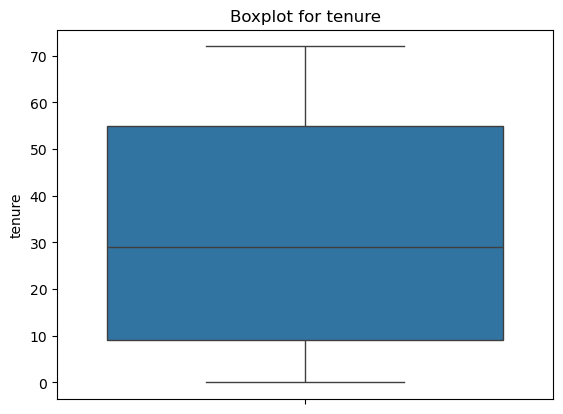

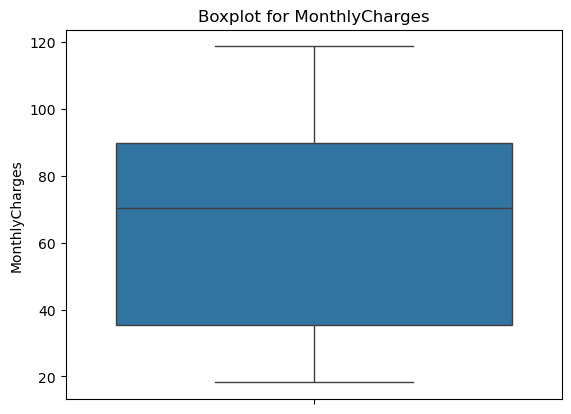

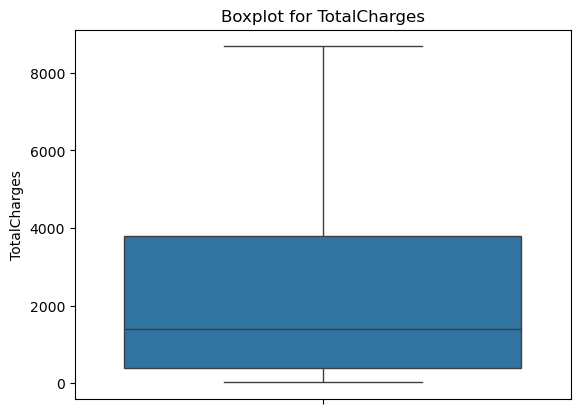

In [21]:
numerical_cols=['tenure','MonthlyCharges','TotalCharges']

for col in numerical_cols:
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

Fortunately,There is no null values in the data.But there is a problem with the datatype of the column totalcharges,so let's figure it out.

In [38]:
print(data['TotalCharges'].dtype)

object


we couldn't convert the datatype directly  to float because of the presence of non-numeric strings

In [14]:
# replace invalid values with nan,then drop them
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')
data_cleaned=data.dropna(subset=['TotalCharges'])

In [16]:
print(data_cleaned['TotalCharges'].dtype)

float64


In [18]:
# Export the cleaned data to excel or csv
data_cleaned.to_excel('Telecom_churn_Cleaned.xlsx',index=False)
import os
os.getcwd()

'C:\\Users\\nisfa\\Downloads'

## Step2:Exploratory data Analysis

In [20]:
print(data_cleaned.info())
print(data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [22]:
data_cleaned.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


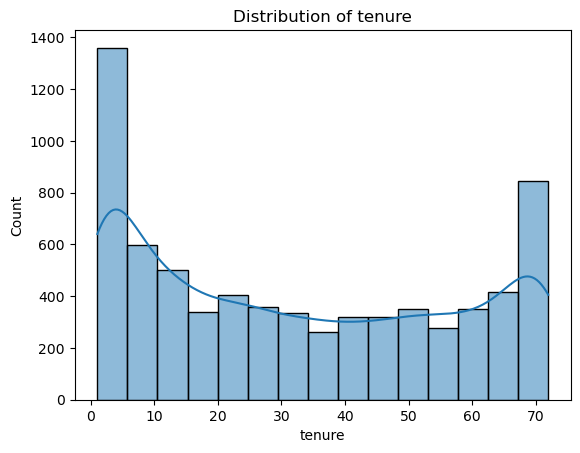

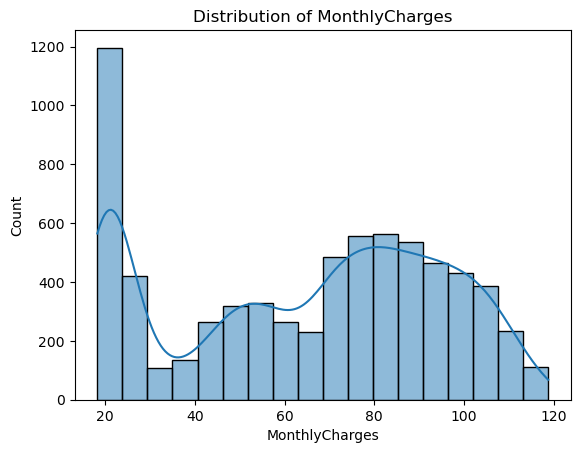

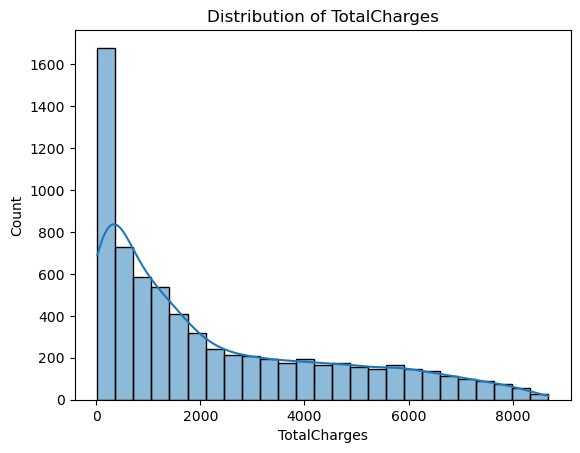

In [24]:
numerical_cols=['tenure','MonthlyCharges','TotalCharges']

for col in numerical_cols:
    sns.histplot(data_cleaned[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

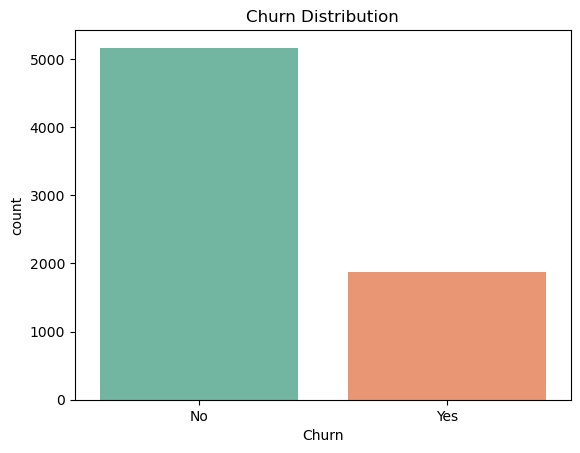

In [25]:
# to understand the propotion of customers who churned vs. stayed

sns.countplot(x='Churn',hue='Churn',data=data_cleaned,palette="Set2")
plt.title('Churn Distribution')
plt.show()

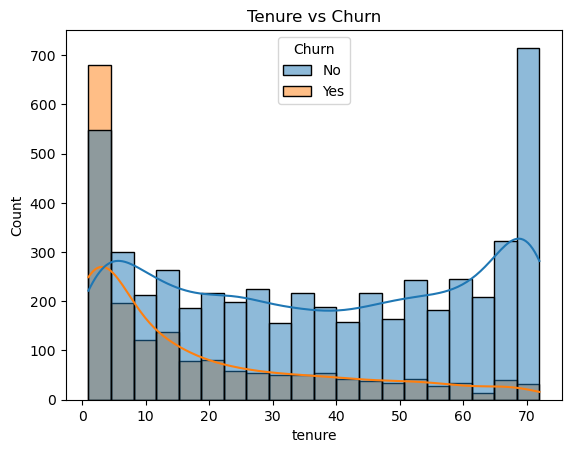

In [28]:
# Relationship between tenure and churn
sns.histplot(data=data_cleaned,x='tenure',hue='Churn',kde=True,bins=20)
plt.title('Tenure vs Churn')
plt.show()

 Newer customers (tenure below 12 months) showed higher churn rates compared to long-term customers.This indicates the importance of improving the       onboarding experince and providing retention offers to new customers.

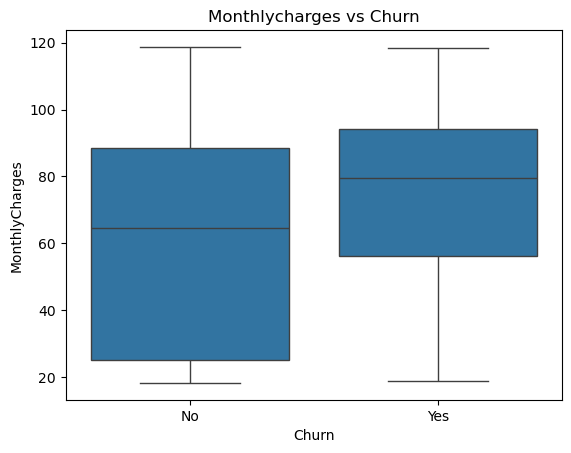

In [26]:
# Examine if customers with higher monthly charges tend to churn more

sns.boxplot(x='Churn',y='MonthlyCharges',data=data_cleaned)
plt.title('Monthlycharges vs Churn')
plt.show()

 Customers with higher monthly charges are more likely to churn.This suggests that cost-sensitive customers may perceive the service
   as too expencive,especially if they don't see sufficient value.

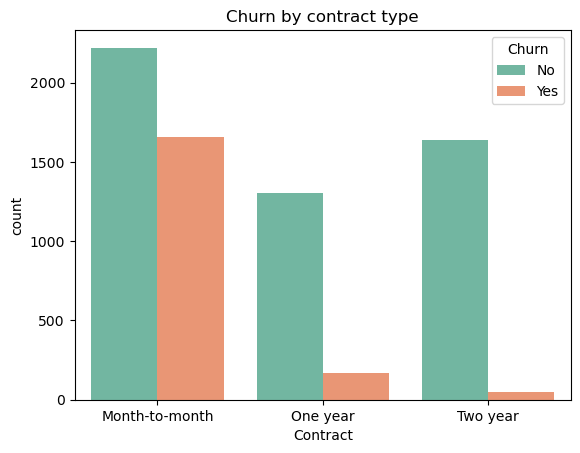

In [28]:
# to examine if customers with certain contract types(monthly,yearly)churn more

sns.countplot(x='Contract',hue='Churn',data=data_cleaned,palette='Set2')
plt.title('Churn by contract type')
plt.show()

 Customers with monthly contracts exhibited significantly higher churn rates compared to those with one-year and two-year
   contracts.This indicates that customers on shorter-term contracts are less committed and more likely to leave.

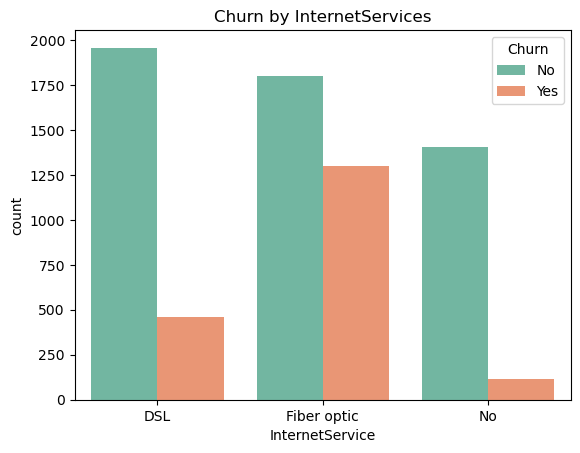

In [30]:
# to determine the costumers specific internet services are more likely to churn

sns.countplot(x='InternetService',hue='Churn',data=data_cleaned,palette='Set2')
plt.title('Churn by InternetServices')
plt.show()

Customers with DSL internet services churned less than those with Fiber Optic internet.This could indicate dissastification with fibre optic service    quality or cost. 

<Axes: xlabel='OnlineSecurity', ylabel='count'>

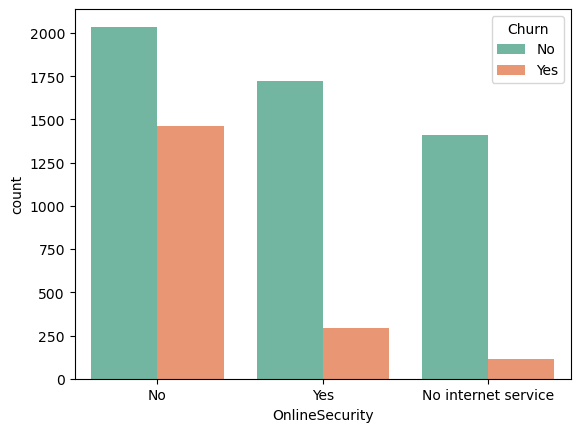

In [108]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=data_cleaned,palette='Set2')

Churn rates are significantly higher for customers without Online Security.Customers value secure online experiences.
Offering comprehensive cybersecurity solutions or bundling it with other services may reduce churn.

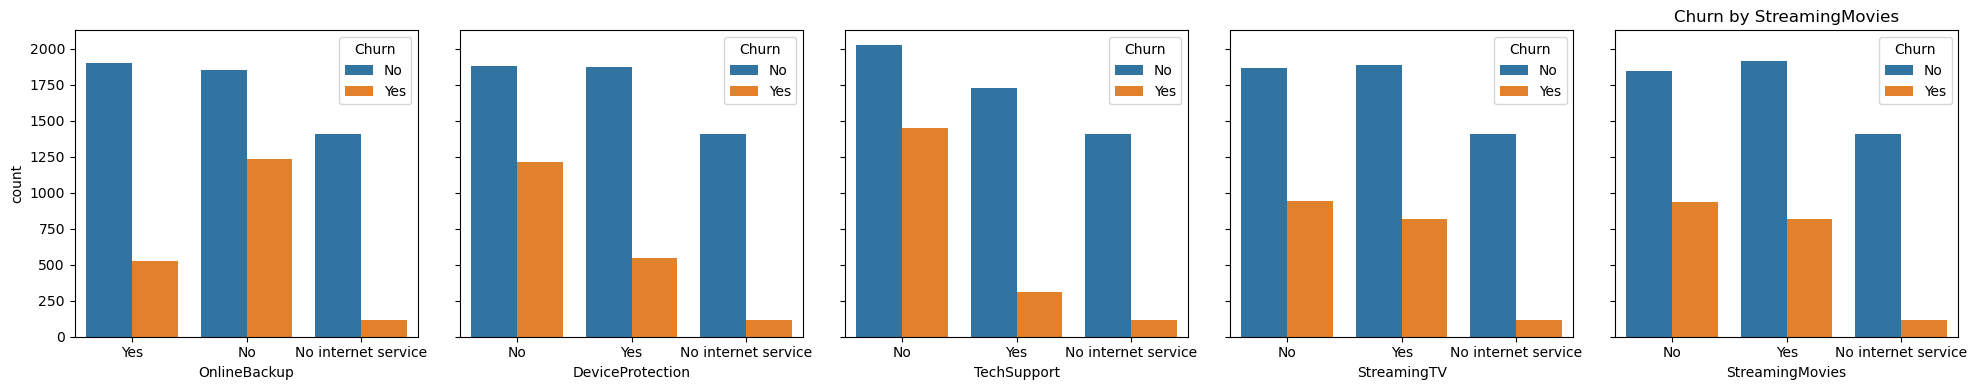

In [42]:
#  Check if costumers who use Specific  add-ons are less likely to churn 
cols=[ 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
fig,axes=plt.subplots(1,len(cols),figsize=(20,4),sharey=True)
for i,col in enumerate(cols):
    sns.countplot(x=col,hue='Churn',data=data_cleaned,ax=axes[i])
    plt.title(f'Churn by {col}')
plt.tight_layout()
plt.show()

 Customers who didn't subscribe to add-on services like Online Backup,Tech Support,or Device Protection were  more likely to churn.offering bundled packages or incentives for these services may improve retention.

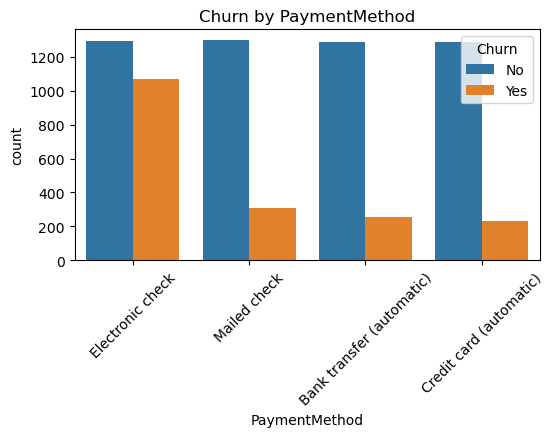

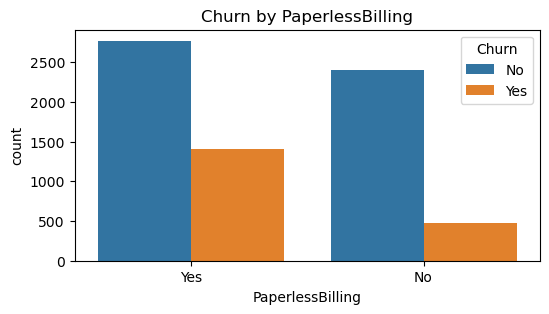

In [72]:
# is churn influenced by payment methods or paperless billing
plt.figure(figsize=(6,3))

sns.countplot(x='PaymentMethod',hue='Churn',data=data_cleaned)
plt.title('Churn by PaymentMethod')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,3))
sns.countplot(x='PaperlessBilling',hue='Churn',data=data_cleaned)
plt.title('Churn by PaperlessBilling')
plt.show()

Customers using electronic check payments method and those with paperless billing had higher churn rates.This could be due to dissatisfaction with      billing clarity or payment methods.
Customers using PaperlessBillinghave higher churn rates,Some customers may assosiate digital billing with impersonal service or find it hard to manage
payments.Providing reminders,better customer education ,or personalizedbilling communication could improve retention.

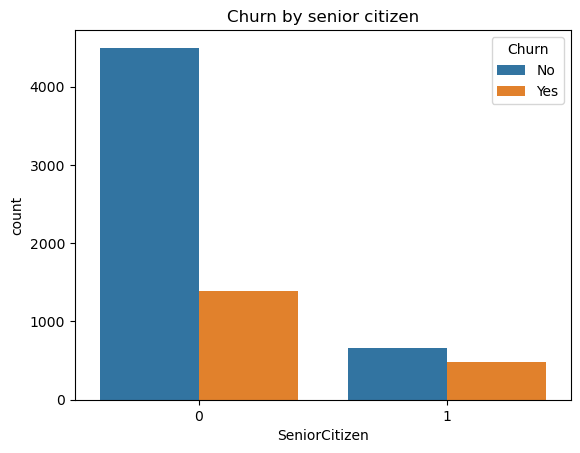

In [130]:
# compare churn rates between senior citizens and younger costumers
sns.countplot(x='SeniorCitizen',hue='Churn',data=data_cleaned)
plt.title('Churn by senior citizen')
plt.show()

 Senior citizens exhibited slightly higher churn rates,which may indicate a need for more personalized support or senior-friendly service packages.

Let's look what are the other factors affecting to the churn

In [66]:
data_cleaned.groupby('Churn')['gender'].value_counts()

Churn  gender
No     Male      2619
       Female    2544
Yes    Female     939
       Male       930
Name: count, dtype: int64

In [62]:
pd.crosstab(data_cleaned['Partner'],data_cleaned['Churn'],normalize='index')*100

Churn,No,Yes
Partner,,
No,67.023908,32.976092
Yes,80.282935,19.717065


Single customers may feel less committed to long-term subscriptions or face financial constraints.Targeting this group of people with personalized offers could improve retention.

In [76]:
pd.crosstab(data_cleaned['PhoneService'],data_cleaned['Churn'],normalize='index')*100

Churn,No,Yes
PhoneService,,
No,75.000000,25.000000
Yes,73.252519,26.747481


In [78]:
pd.crosstab(data_cleaned['MultipleLines'],data_cleaned['Churn'],normalize='index')*100

Churn,No,Yes
MultipleLines,,
No,74.918759,25.081241
No phone service,75.000000,25.000000
Yes,71.351534,28.648466


Churn rates are higher for customers with multiple phone lines compared to those without.These customers may perceive the service as expencive or redundant.Introducing more flexible family plans or discounts could help.

## Step3:Model Development

### Encoding the Categorical columns 

In [30]:
from sklearn.preprocessing import LabelEncoder

#columns to encode
binary_cols=['gender','Partner','Dependents','PhoneService','Churn','PaperlessBilling']
#Apply label encoding
le=LabelEncoder()
for col in binary_cols:
    data_cleaned[col]=le.fit_transform(data_cleaned[col])
print(data_cleaned.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to

In [32]:
# for columns more than two categories
multi_cols=['OnlineBackup','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
            'PaymentMethod']
data_cleaned=pd.get_dummies(data_cleaned,columns=multi_cols,drop_first=True)
print(data_cleaned.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1       

### Feature Selection

In [35]:
data_cleaned.drop('customerID',axis=1,inplace=True)

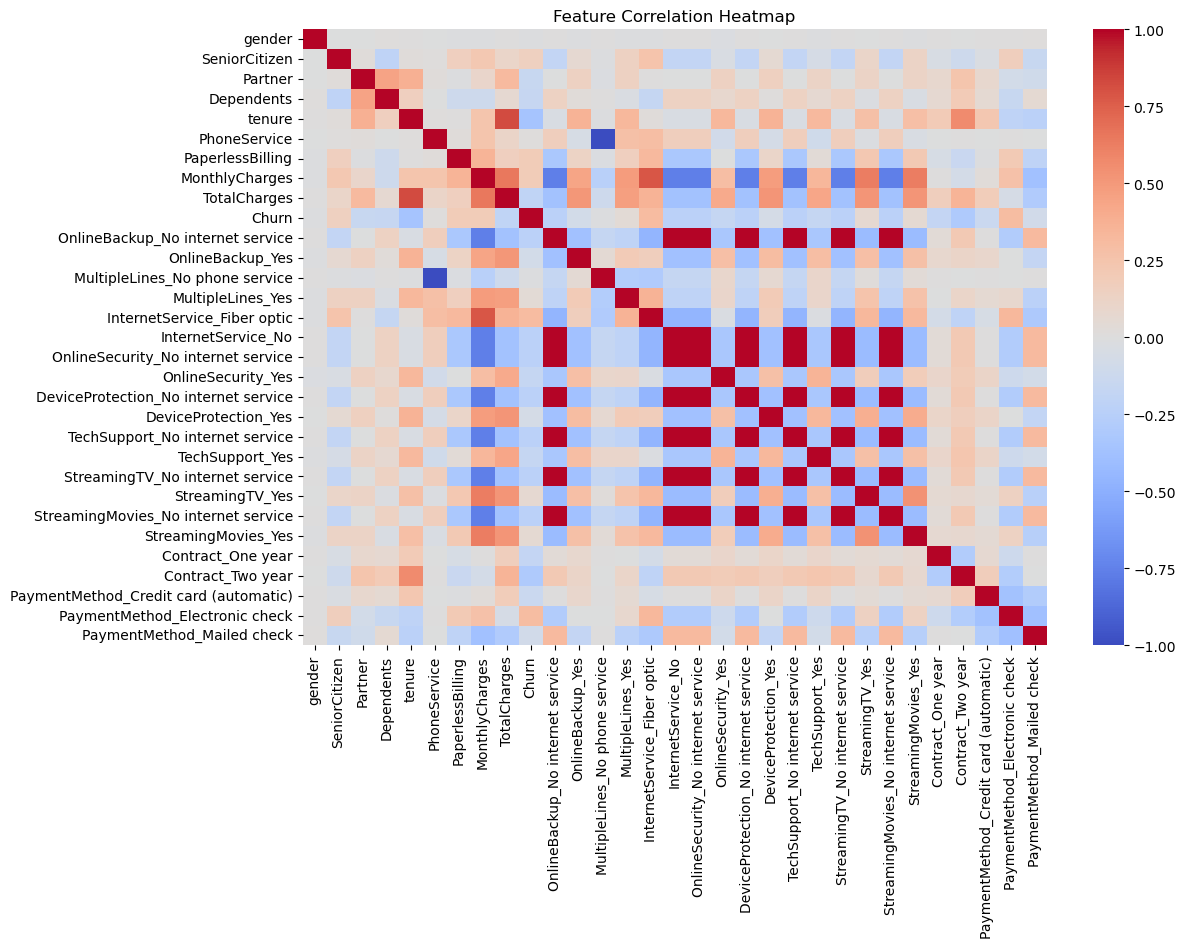

In [37]:
# to identify which features are most important for predicting churn
plt.figure(figsize=(12,8))
sns.heatmap(data_cleaned.corr(numeric_only=True),annot=False,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

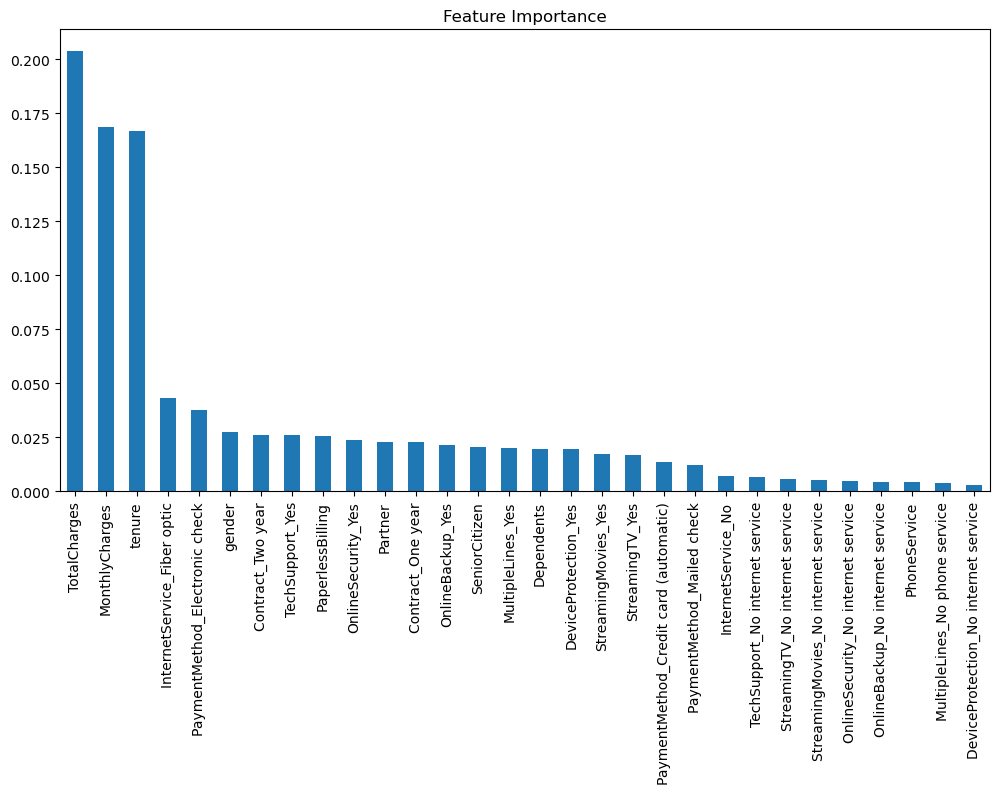

In [39]:
# Feature importance using Random Forest, it can rank feature importance even with categorical data

from sklearn.ensemble import RandomForestClassifier
#define feature and target
X=data_cleaned.drop(columns=['Churn'])
y=data_cleaned['Churn']
# Train basic Random Forest model
rf=RandomForestClassifier(random_state=42)
rf.fit(X,y)

#Feature importance plot
importances=pd.Series(rf.feature_importances_,index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar',figsize=(12,6),title='Feature Importance')
plt.show()

### Model Building

In [42]:
# splitting the dataset into train and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [44]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [50]:
classifiers = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0),
    SVC(kernel = 'linear', random_state = 0), 
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    ]

name = []
score = []
models = []

i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    

### Comparing Model Performance

In [54]:
df_score = pd.DataFrame(list(zip(name, score, models)),columns=['name','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,score,model
name,,
KNeighborsClassifier,0.764037,KNeighborsClassifier()
RandomForestClassifier,0.796020,"(DecisionTreeClassifier(criterion='entropy', m..."
SVC,0.797441,"SVC(kernel='linear', random_state=0)"
LogisticRegression,0.807392,LogisticRegression(random_state=0)


Logistic Regression is currently the best performing model with an accuracyof 80.7%,indicating it fits the linear relation ship between features and targets well.

**Prediction**

In [53]:
LGR_model=LogisticRegression(random_state=0)
LGR_model.fit(X_train,y_train.values.ravel())

LogisticRegression(random_state=0)

In [36]:
X_test.shape

(1407, 30)

In [55]:
y_pred_LGR=LGR_model.predict(X_test)
y_pred_LGR

array([0, 0, 0, ..., 1, 0, 1])

In [61]:
cm = confusion_matrix(y_test, y_pred_LGR)
print(cm)
accuracy_score(y_test, y_pred_LGR)
print('classification report:\n',classification_report(y_test,y_pred_LGR))

[[933 105]
 [166 203]]
classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.66      0.55      0.60       369

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



## THANK YOU